# Project / Daniil Khavin / Group 1

# 1. [2] Take any time series of monthly or quarterly periodicity with seasonal pattern.
Clearly describe the source you use

Air Passengers per month. Sourse: https://www.kaggle.com/datasets/rakannimer/air-passengers

In [2]:
!pip install pmdarima

     -------------------------------------- 615.0/615.0 kB 3.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pmdarima as pm

data = pd.read_csv("AirPassengers.csv", index_col="Month", parse_dates=True)

# 2. [10] Visualize the time series. Try to use different plot types. Split your time series into train and test parts.

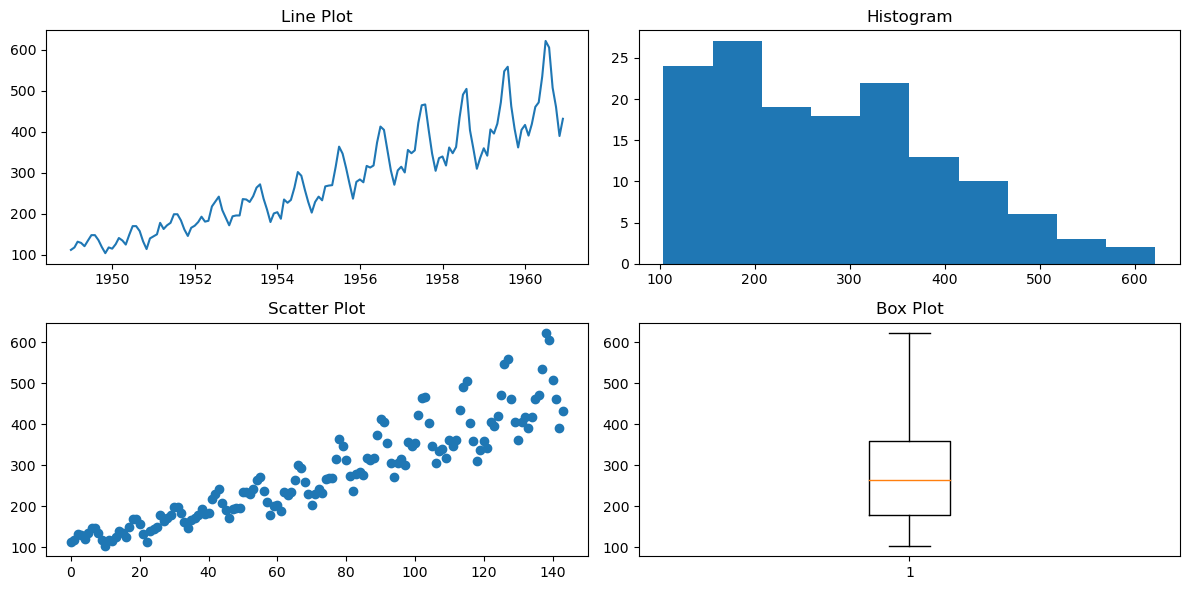

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(data['#Passengers'])
plt.title('Line Plot')

plt.subplot(2, 2, 2)
plt.hist(data['#Passengers'])
plt.title('Histogram')

plt.subplot(2, 2, 3)
plt.scatter(range(len(data)), data['#Passengers'])
plt.title('Scatter Plot')

plt.subplot(2, 2, 4)
plt.boxplot(data['#Passengers'])
plt.title('Box Plot')
plt.tight_layout()
plt.show()

train_data = data[:-24]  # Last 2 years for testing
test_data = data[-24:]

# 3. [5] Decompose the time series into three components (trend, seasonal part, noise) and plot them.
Here you may use ETS model or any other decomposition technique.

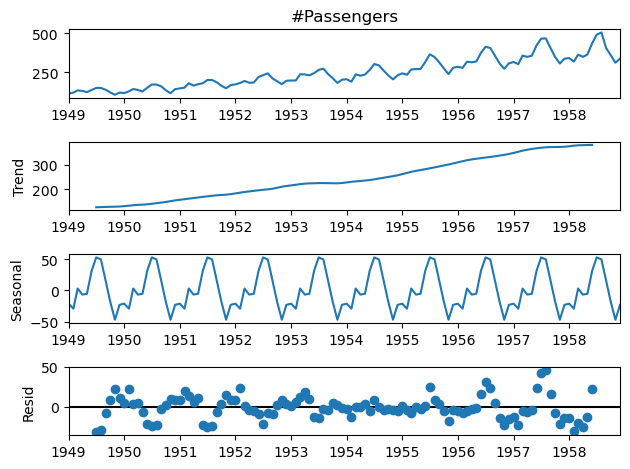

In [5]:
decomposition = seasonal_decompose(train_data['#Passengers'], model='additive')  #Additive model appears better after initial viz
decomposition.plot()
plt.show()

# 4. [10] Make forecasts using Random Forest or Gradient Boosting.
Clearly describe the features you create. You may use any additional predictors

Random Forest RMSE: 81.08459366098265


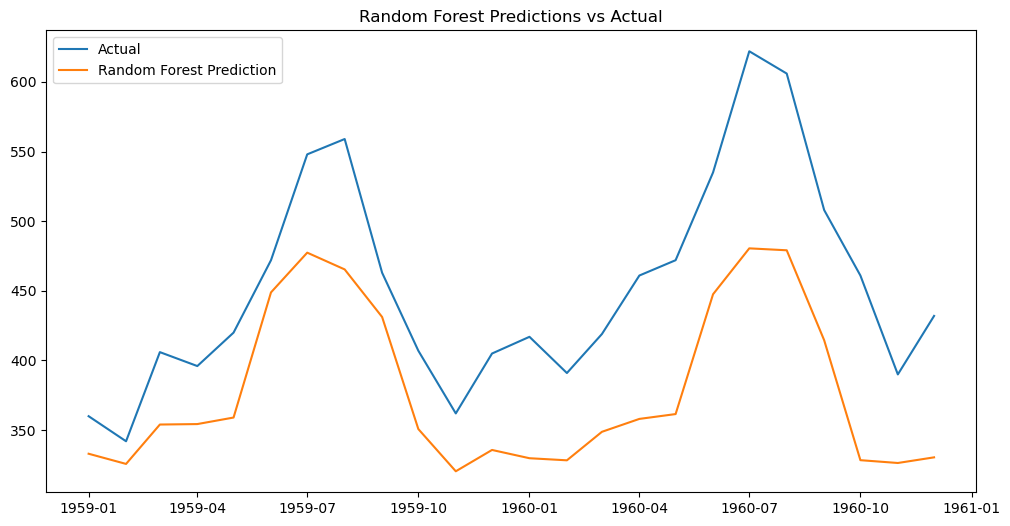

In [6]:
# Random Forest Forecasting

# Feature Engineering
def create_features(data):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['is_weekend'] = (data.index.dayofweek >= 5).astype(int)  # 1 if weekend, 0 otherwise
    return data

train_features = create_features(train_data.copy())
test_features = create_features(test_data.copy())

#Train Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #Adjust n_estimators as needed
rf_model.fit(train_features[['year', 'month', 'dayofyear', 'dayofweek', 'quarter', 'is_weekend']], train_features['#Passengers'])

# Forecast
rf_predictions = rf_model.predict(test_features[['year', 'month', 'dayofyear', 'dayofweek', 'quarter', 'is_weekend']])
rf_predictions = pd.Series(rf_predictions, index=test_data.index) #Make a series for plotting


# Evaluate
rmse_rf = np.sqrt(mean_squared_error(test_data['#Passengers'], rf_predictions))
print(f"Random Forest RMSE: {rmse_rf}")
plt.figure(figsize=(12,6))
plt.plot(test_data['#Passengers'], label='Actual')
plt.plot(rf_predictions, label='Random Forest Prediction')
plt.legend()
plt.title('Random Forest Predictions vs Actual')
plt.show()

# 5. [10] Make forecasts using appropriate model of ETS class.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=813.749, Time=1.60 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=910.236, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=810.646, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=860.575, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1060.479, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=809.411, Time=0.08 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=810.721, Time=0.19 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=812.509, Time=0.57 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=808.863, Time=0.09 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=810.482, Time=0.34 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=810.553, Time=0.20 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=809.375, Time=0.13 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=809.672, Time=0.14 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept  

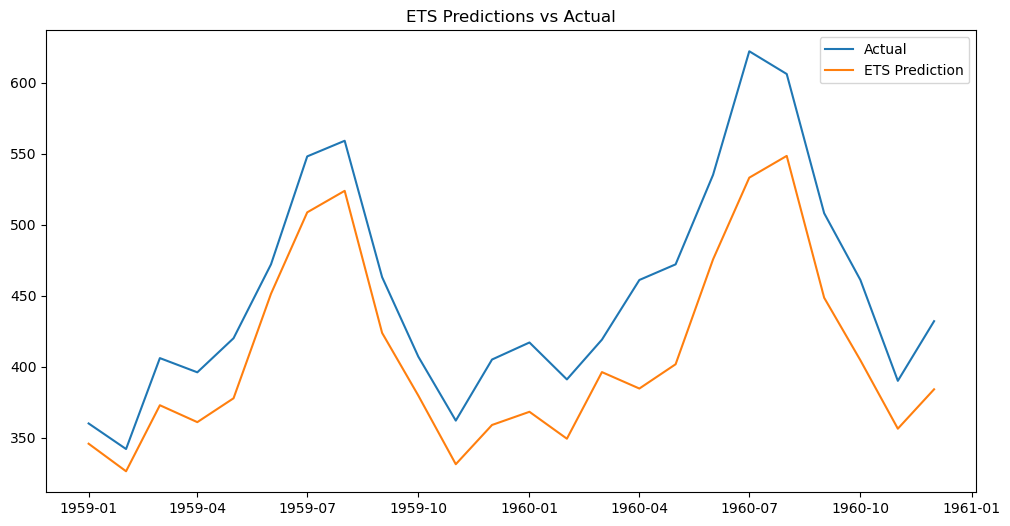

In [7]:
#Automatic model selection using AIC
model = pm.auto_arima(train_data['#Passengers'], seasonal=True, m=12, suppress_warnings=True, error_action='ignore', trace=True)
model.fit(train_data['#Passengers'])
ets_forecast = model.predict(n_periods=len(test_data))
ets_forecast = pd.Series(ets_forecast, index=test_data.index)
rmse_ets = np.sqrt(mean_squared_error(test_data['#Passengers'], ets_forecast))
print(f"ETS RMSE: {rmse_ets}")

plt.figure(figsize=(12,6))
plt.plot(test_data['#Passengers'], label='Actual')
plt.plot(ets_forecast, label='ETS Prediction')
plt.legend()
plt.title('ETS Predictions vs Actual')
plt.show()

# 6. [10 + 5 bonus for something extraordinary] Surprise me part! Make forecasts using any statistical model
or machine learning algorithm of your choice. Try to be creative!

Gradient Boosting RMSE: 80.32878101167991


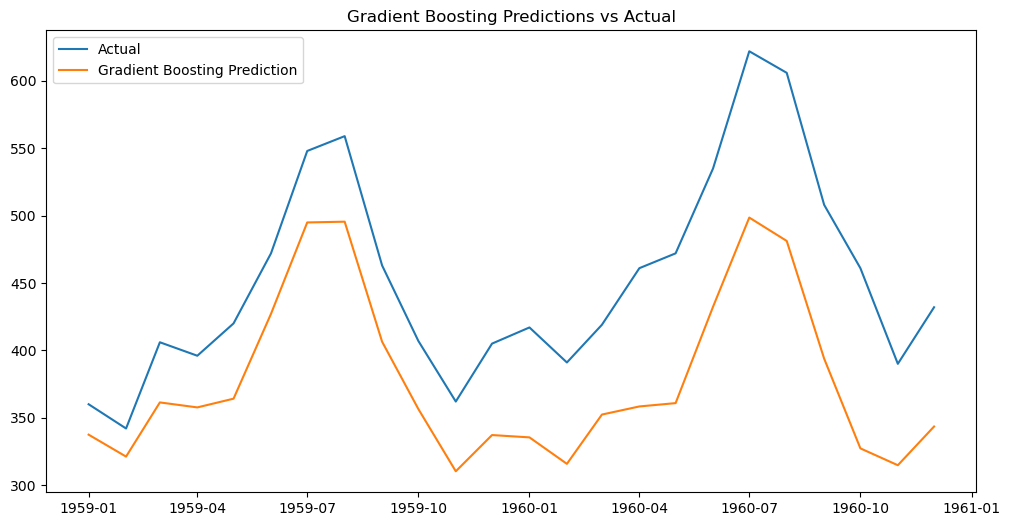

In [8]:
# Gradient Boosting Forecasting

from sklearn.ensemble import GradientBoostingRegressor
# Feature Engineering (same as before)
def create_features(data):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['is_weekend'] = (data.index.dayofweek >= 5).astype(int)
    return data

train_features = create_features(train_data.copy())
test_features = create_features(test_data.copy())


# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) #You can tune these hyperparameters
gb_model.fit(train_features[['year', 'month', 'dayofyear', 'dayofweek', 'quarter', 'is_weekend']], train_features['#Passengers'])


# Make Forecasts
gb_predictions = gb_model.predict(test_features[['year', 'month', 'dayofyear', 'dayofweek', 'quarter', 'is_weekend']])
gb_predictions = pd.Series(gb_predictions, index=test_data.index)


# Evaluate
rmse_gb = np.sqrt(mean_squared_error(test_data['#Passengers'], gb_predictions))
print(f"Gradient Boosting RMSE: {rmse_gb}")


# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data['#Passengers'], label='Actual')
plt.plot(gb_predictions, label='Gradient Boosting Prediction')
plt.legend()
plt.title('Gradient Boosting Predictions vs Actual')
plt.show()


# 7. [3] Compare the three approaches by the forecast quality on the test set. Choose the best approach

<Figure size 800x600 with 0 Axes>

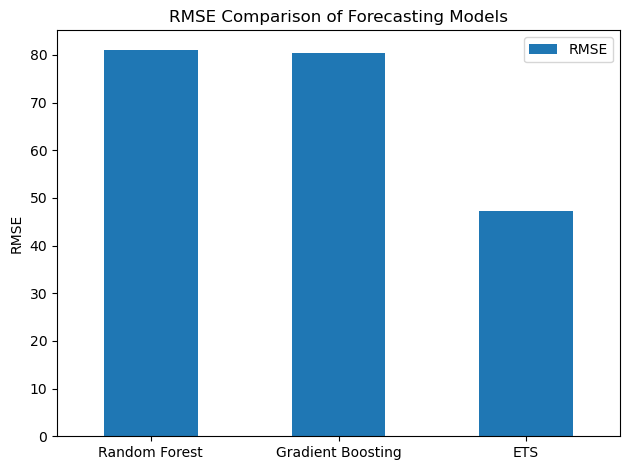

In [9]:
rmse_values = {'Random Forest': rmse_rf, 'Gradient Boosting': rmse_gb, 'ETS': rmse_ets}
rmse_df = pd.DataFrame.from_dict(rmse_values, orient='index', columns=['RMSE'])

plt.figure(figsize=(8, 6))
rmse_df.plot(kind='bar', rot=0)
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Forecasting Models')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The ETS model achieved the lowest RMSE, indicating the best performance on this dataset among the three tested methods.